# Caso de Estudio N°1

1- El problema que se presenta es la disminución de la efectividad de las campañas de marketing de una institución financiera en los últimos 6 meses, lo cual ha llevado a que el indicador de efectividad caiga del 12% al 8%. El objetivo de negocio es aumentar la efectividad de las futuras campañas de marketing.

2- En el problema de negocio se utilizan las siguientes variables:

 - Variables demográficas: age (edad), job (trabajo), marital (estado civil), education (nivel educativo).
- Variables relacionadas con la situación financiera: default (crédito en mora), housing (crédito hipotecario), loan (crédito personal).
- Variables de contacto y campaña: contact (canal de comunicación), month (último mes de contacto), day_of_week (último día de la semana de contacto), duration (duración de la llamada), campaign (número de contactos en la campaña actual), pdays (días desde la última gestión en campañas), previous (número de contactos antes de la campaña actual), poutcome (tipificación de aceptación en campaña anterior).
- Variables económicas: emp.var.rate (tasa de variación del empleo), cons.price.idx (índice de precios al consumidor), cons.conf.idx (índice de confianza al consumidor), euribor3m (ratio de tipo de cambio medio en los últimos 3 meses), nr.employed (número de empleados).

3- Para resolver este problema de negocio y cumplir con los objetivos planteados, se puede utilizar la ciencia o analítica de datos de la siguiente manera:

a) Realizar un análisis exploratorio de datos: Se debe realizar un análisis detallado de los datos disponibles en el dataset BankMarketing.csv. Esto incluye comprender la distribución de las variables, identificar posibles relaciones o patrones entre las variables y analizar la tendencia de la efectividad en función de diferentes características.

b) Identificar variables relevantes: Mediante técnicas de análisis estadístico y visualización de datos, es importante identificar las variables que tienen una mayor influencia en la efectividad de las campañas de marketing. Esto permitirá enfocar los esfuerzos en aquellas variables que tienen un impacto significativo.

c) Modelado predictivo: Se pueden utilizar técnicas de aprendizaje automático (machine learning) para construir modelos predictivos que ayuden a predecir la efectividad de las campañas de marketing. Estos modelos pueden utilizar las variables disponibles para realizar predicciones y brindar información sobre las estrategias más efectivas.

d) Segmentar clientes: Es posible realizar una segmentación de clientes basada en diferentes características demográficas, financieras y de contacto. Esto ayudará a identificar grupos de clientes con características similares que puedan tener comportamientos de respuesta similares ante las campañas de marketing.

e) Optimizar estrategias: Utilizando los resultados del análisis y los modelos predictivos, se pueden desarrollar estrategias personalizadas para diferentes segmentos de clientes. Estas estrategias pueden incluir el ajuste de los canales de comunicación, la frecuencia de contacto, el contenido de las ofertas y la selección de momentos óptimos para realizar las campañas.

f) Evaluación y mejora continua: Es importante evaluar regularmente los resultados de las campañas de marketing y ajustar las estrategias según sea necesario. Esto implica realizar un seguimiento de los indicadores de efectividad, realizar análisis de retorno de inversión (ROI) y recopilar comentarios de los clientes para mejorar continuamente las campañas futuras.

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(
    "D://Coderhouse//10. Estudios de Casos de Modelos Analíticos//CSVs Casos//BankMarketing.csv",
    sep=";",
)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Exploración de la Data

Luego de cargar nuestro dataset, examinamos la cantidad de filas presentes en el mismo y si tenemos valores faltantes.

In [9]:
# Número de filas en el dataset

print("Bank marketing dataset contiene {rows} filas.".format(rows=len(df)))

Bank marketing dataset contiene 41188 filas.


In [6]:
# Verificamos las primeras filas del dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
# Resumen estadístico de las variables numéricas
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# Verificamos el tipo de datos de cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# Contamos los valores únicos en cada columna categórica
print(df.nunique())

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [13]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [12]:
# Verificamos la distribución de la variable objetivo (y)
print(df["y"].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


### Exploración de variables categóricas:

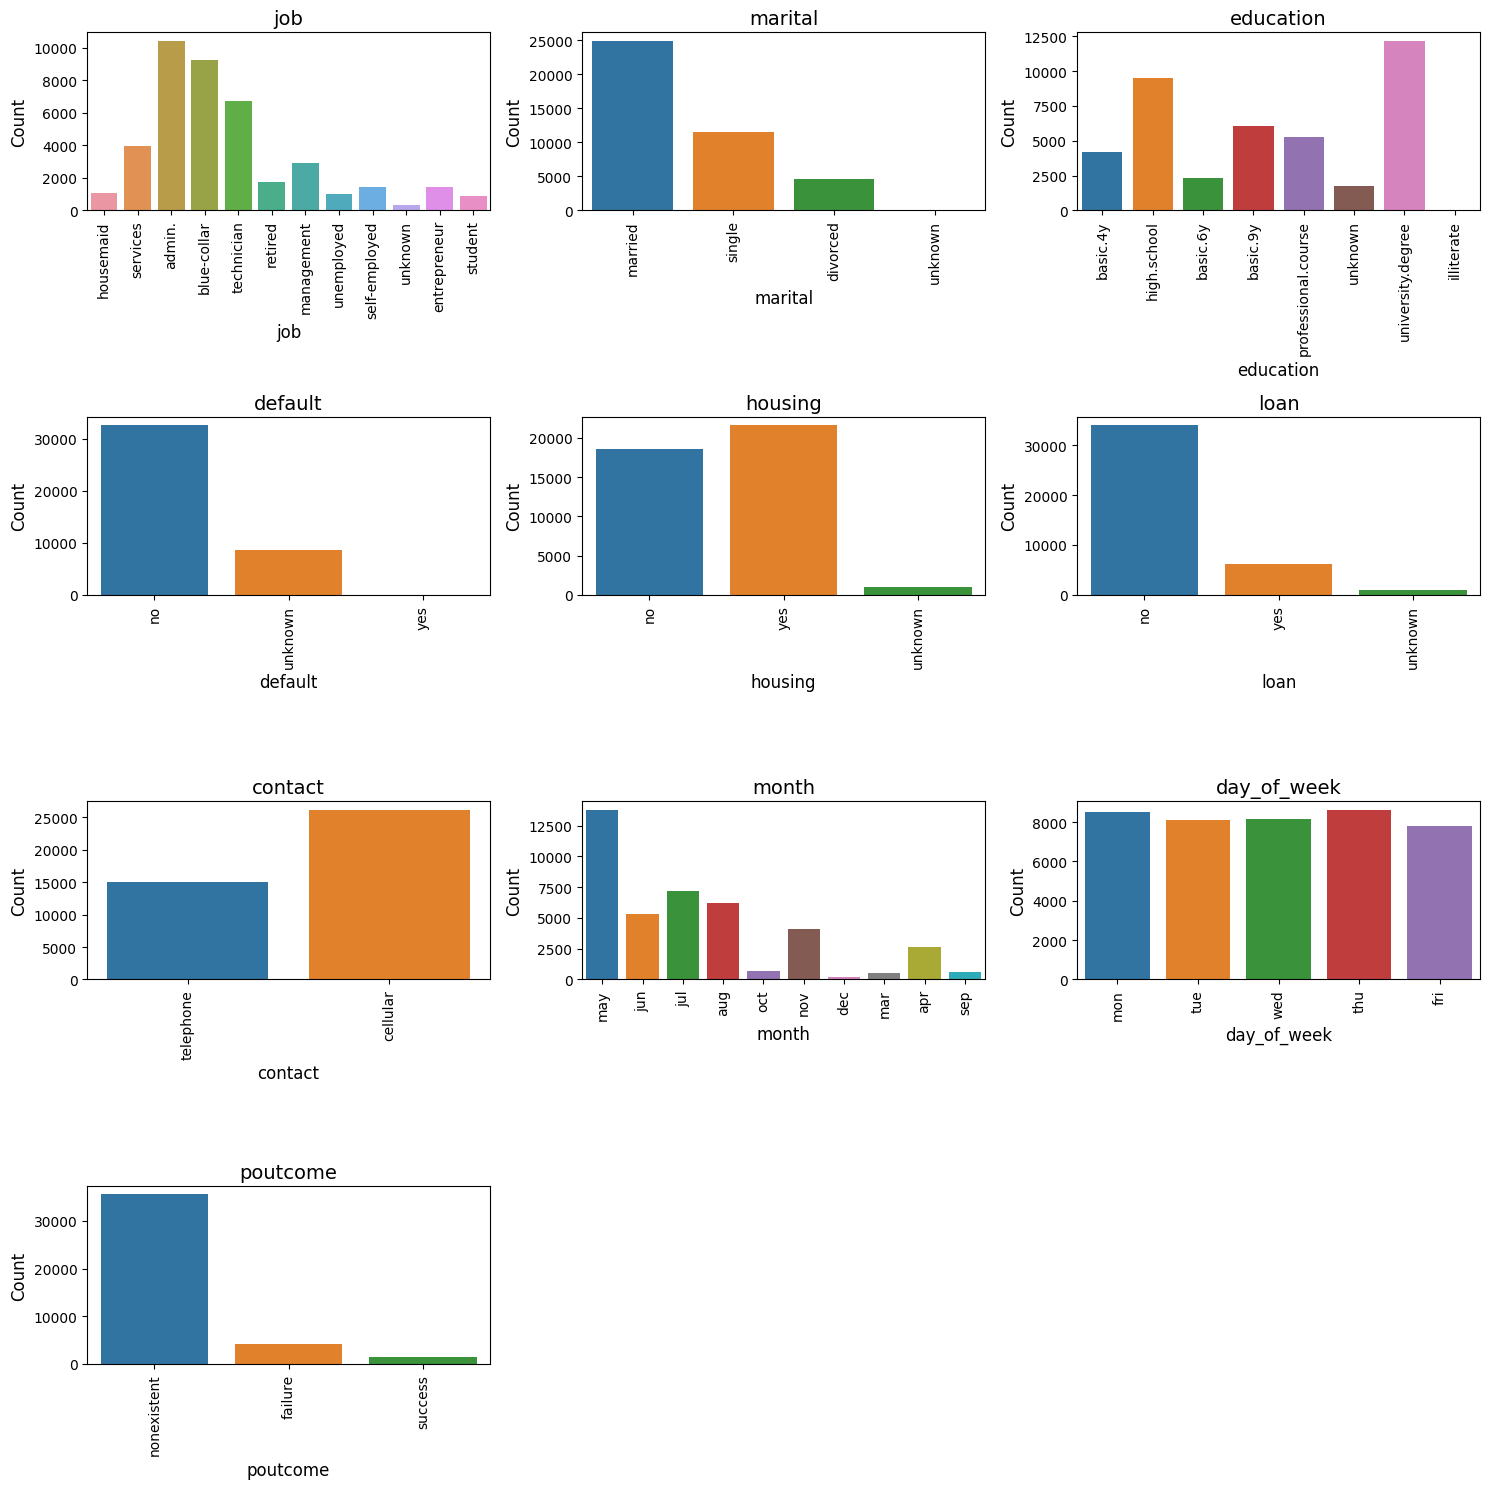

In [25]:
# Variables categóricas a visualizar
categorical_vars = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "day_of_week",
    "poutcome",
]

# Calcular el número de filas y columnas para la grilla
num_rows = 4
num_cols = 3

# Crear subplots para cada variable categórica en una grilla de 3x3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Generar gráficos de barras para cada variable categórica
for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"{var}", fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Eliminar los subplots no utilizados
if i < (num_rows * num_cols - 1):
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### Exploración de variables numéricas: